# Homework 1

### Grupo 75
### Henrique Caroço (ist1103860) e Luís Calado (ist1103883)

## II. Programming [9v]

### To answer the following questions, consider using the sklearn API documentation and the notebooks in the course webpage as guidance. Show in your PDF report both the code and the corresponding results. Consider the column_diagnosis.arff data available at the homework tab, comprising 6 biomechanical features to classify 310 orthopaedic patients into 3 classes (normal, disk hernia, spondilolysthesis).

### 1) [1.5v] Apply f_classif from sklearn to assess the discriminative power of the input variables. Identify the input variable with the highest and lowest discriminative power. Plot the class-conditional probability density functions of these two input variables.

In [23]:
from sklearn.feature_selection import f_classif
from scipy.io.arff import loadarff
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

In [25]:
# Separate features from the outcome (class)
X = df.drop('class', axis=1)
y = df['class']

In [26]:
fimportance = f_classif(X, y)  #0 - fvalue, 1 - pvalue

highest_index = fimportance[0].argmax()
lowest_index = fimportance[0].argmin()

highest_power, lowest_power = X.columns[highest_index], X.columns[lowest_index]

print('Input variable with the highest discriminative power:',highest_power)
print('Input variable with the lowest discriminative power:', lowest_power)

Input variable with the highest discriminative power: degree_spondylolisthesis
Input variable with the lowest discriminative power: pelvic_radius


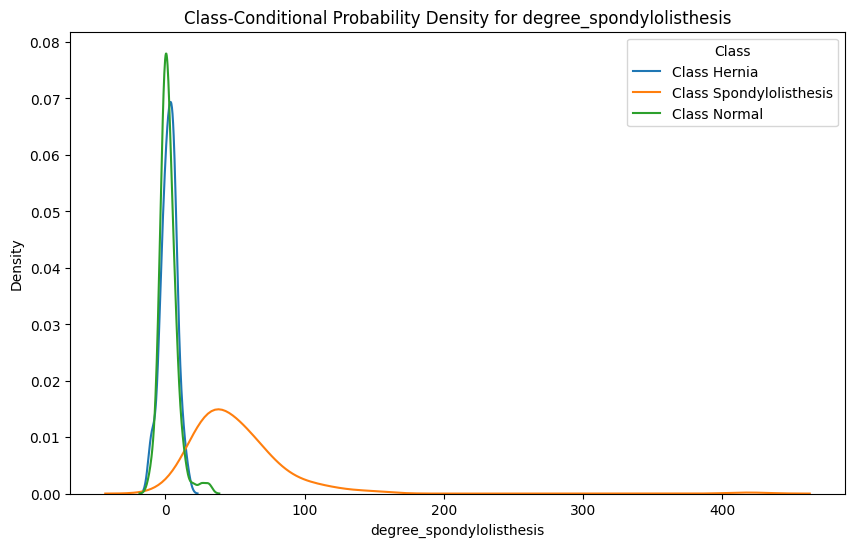

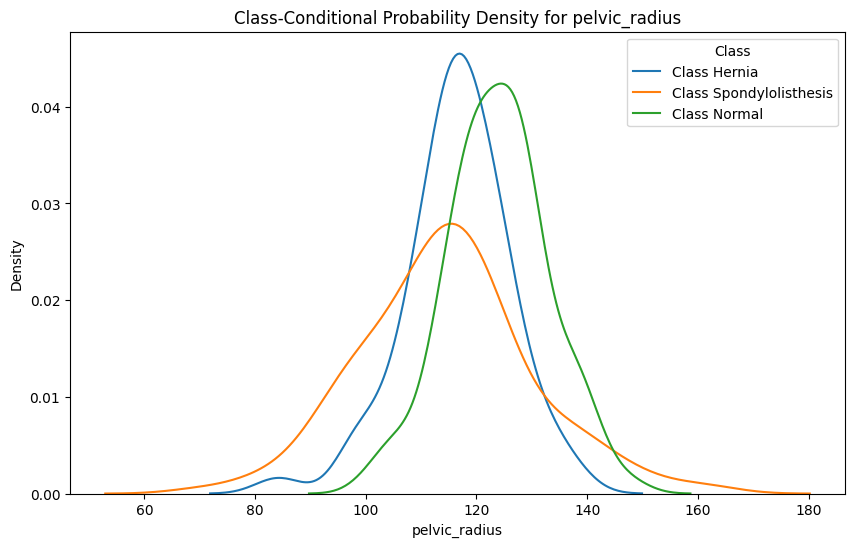

In [5]:
# Plot class-conditional probability density functions
# Plot highest discriminative power feature
classes = df['class'].unique()

plt.figure(figsize=(10, 6))
for target_class in classes:
    subset = df[df['class'] == target_class]
    sns.kdeplot(subset[highest_power], label=f'Class {target_class}')
plt.xlabel(highest_power)
plt.ylabel('Density')
plt.title(f'Class-Conditional Probability Density for {highest_power}')
plt.legend(title='Class')
plt.show()

# Plot lowest discriminative power feature
plt.figure(figsize=(10, 6))
for target_class in classes:
    subset = df[df['class'] == target_class]
    sns.kdeplot(subset[lowest_power], label=f'Class {target_class}')
plt.xlabel(lowest_power)
plt.ylabel('Density')
plt.title(f'Class-Conditional Probability Density for {lowest_power}')
plt.legend(title='Class')
plt.show()


### 2) [4v] Using a stratified 70-30 training-testing split with a fixed seed (random_state=0), assess in a single plot both the training and testing accuracies of a decision tree with depth limits in {1,2,3,4,5,6,8,10} and the remaining parameters as default. <br> [optional] Note that split thresholding of numeric variables in decision trees is non-deterministic in sklearn, hence you may opt to average the results using 10 runs per parameterization.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
import pandas as pd

In [28]:
# Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

In [29]:
# Separate features from the outcome (class)
X = df.drop('class', axis=1)
y = df['class']

In [30]:
depth_limits = [1, 2, 3, 4, 5, 6, 8, 10]

# Split the dataset into a training set (70%) and a testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 0, stratify=y)

training_accuracies, testing_accuracies = [], []

In [31]:
for depth in depth_limits:
    # learn classifier using hold-out partitioning
    predictor = DecisionTreeClassifier(max_depth=depth)
    predictor.fit(X_train, y_train)
    
    # Predictions on training and testing sets
    y_train_pred = predictor.predict(X_train)
    y_test_pred = predictor.predict(X_test)

    # Calculate training and testing accuracies and append them to the respective lists
    training_accuracies.append(accuracy_score(y_train, y_train_pred))
    testing_accuracies.append(accuracy_score(y_test, y_test_pred))
    

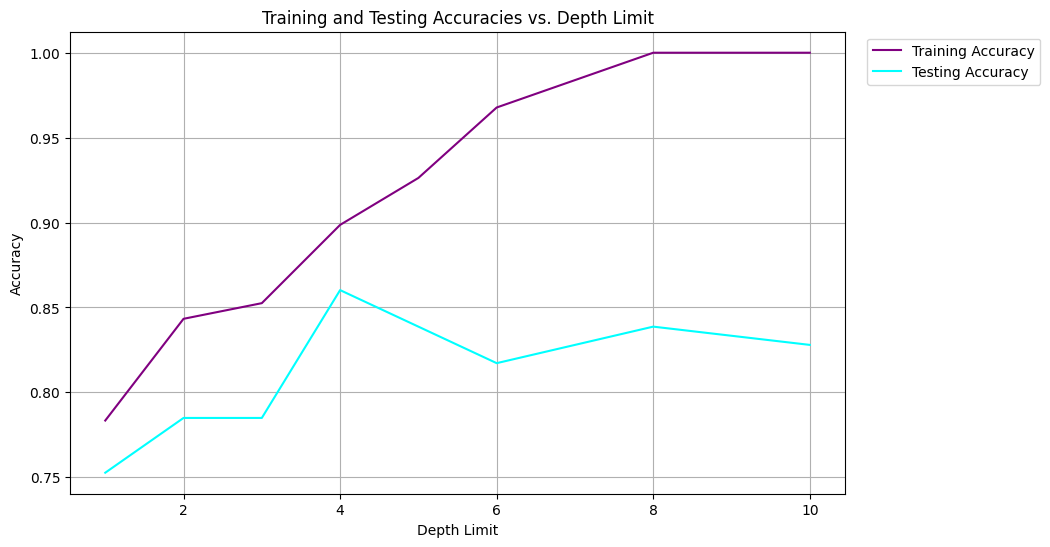

In [32]:
#draw plot
plt.figure(figsize=(10, 6))
plt.plot(depth_limits, training_accuracies, label='Training Accuracy', color= 'purple')
plt.plot(depth_limits, testing_accuracies, label='Testing Accuracy', color = 'cyan')
plt.xlabel('Depth Limit')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracies vs. Depth Limit')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.grid(True)
plt.show()

### 3) [1.5v] Comment on the results, including the generalization capacity across settings.

Analisando a training accuracy, podemos ver que ela aumenta à medida que o limite de profundidade da árvore aumenta. O que demonstra, que a nossa árvore de decisão, tem um bom desempenho nos treinos que efetuou.
<br>Em relação à testing accuracy, ela acaba também por aumentar à medida que o limite de profundidade aumenta, que indica que o modelo generaliza melhor mesmo com o aumento da complexidade do modelo. Contudo, por volta do limite de profundidade 4, a testing accuracy fica constante, sendo que depois até diminui.
<br>Esta descida na testing accuracy, indica-nos que estamos com o problema de overfitting. O modelo tem um bom desempenho nos treinos, mas não consegue generalizar bem para dados não vistos, acabando por reduzir a testing accuracy.
<br>O pico da testing accuracy (com  limite de profundidade 4) representa a capacidade de generalização óptima do modelo, pois para além deste ponto começa a ocorrer overfitting e a complexidade do modelo aumenta provocando uma diminuição da testing accuracy.
<br>Assim, para obter a melhor capacidade de generalização, é essencial selecionar um limite de profundidade adequado que equilibre a complexidade do modelo e o desempenho em dados não vistos. Um limite de profundidade de cerca de 4 parece ser ideal, resultando no maior equilíbrio entre  precisão de teste e generalização para dados não vistos. 


### 4) [2v] To deploy the predictor, a healthcare team opted to learn a single decision tree (random_state=0) using all available data as training data, and further ensuring that each leaf has a minimum of 20 individuals in order to avoid overfitting risks.

### i. Plot the decision tree.

In [33]:
from scipy.io.arff import loadarff
import pandas as pd
from sklearn.tree import plot_tree, DecisionTreeClassifier
import matplotlib.pyplot as plt

In [34]:
# Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

In [35]:
# Separate features from the outcome (class)
X = df.drop('class', axis=1)
y = df['class']

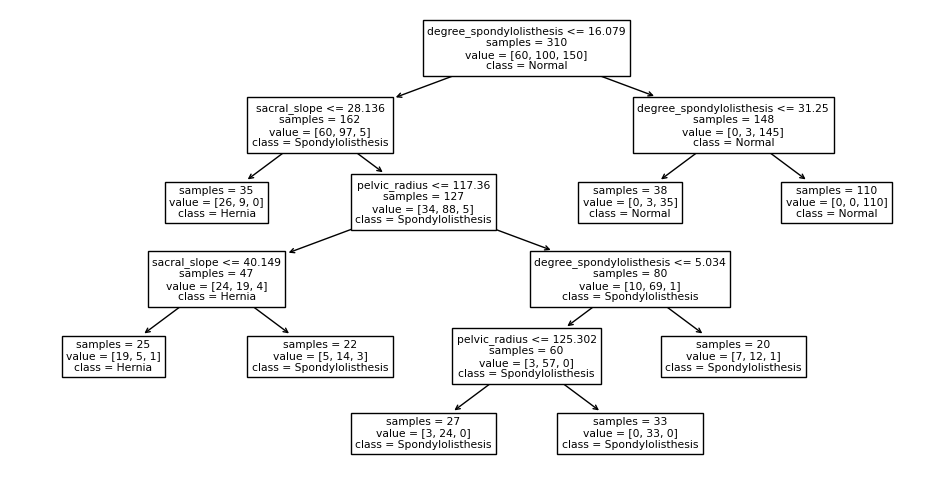

In [36]:
# learn classifier
predictor = DecisionTreeClassifier(min_samples_leaf=20, random_state=0)
predictor.fit(X, y)

class_names = df['class'].unique()

figure = plt.figure(figsize=(12, 6))
plot_tree(predictor, feature_names=X.columns, 
class_names=class_names, impurity=False)

plt.show()

### ii. Characterize a hernia condition by identifying the hernia-conditional associations.

* Se o grau de espondilolistese for menor ou igual que 16.079, e o declive sacral for menor ou igual que 28.136, então o indivíduo deve ter uma hérnia.  
* Caso o grau de espondilolistese seja menor ou igual que 16.079, e  o declive sacral esteja entre 28.136 e  40.149(inclusivé), e o seu raio da bacia seja inferior ou igual a 117.36, o indivíduo deve uma hérnia.